In [1]:
from maze_env import Maze
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import glob
import pickle

def get_latest_folder(base_name):
    index = 1
    while True:
        folder = f"{base_name}_{index}"
        if not os.path.exists(folder):
            folder = f"{base_name}_{index-1}"
            return folder
        index += 1
folder = get_latest_folder("world")

from maze_PTR_model import MazePTRModel
model = MazePTRModel()
checkpoint = torch.load(f"{folder}/models/last_model.pt")
model.load_state_dict(checkpoint)
model.eval()

# iterations
iters = 50000
initial_epsilon = 1.0
eps_anneal_rate = 0.3
alpha= 0.5
gamma = 0.99
eval_episodes = 1000
eval_steps = 100

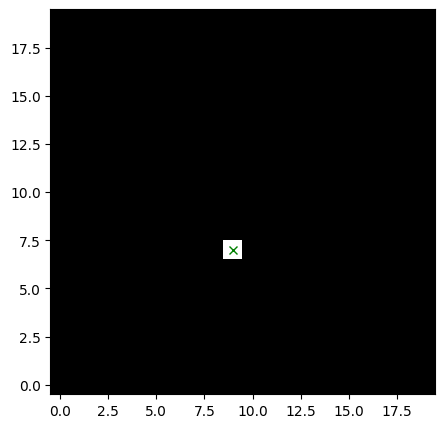

In [2]:
#Create new env with estimated reward and train agent
env_1 = Maze(sparse=True, move_penalty=0.1)
env_1.plot_reward()
#Q_1 = env_1.value_iter2(iters=iters, alpha=alpha,gamma=gamma,initial_eps=initial_epsilon, eps_anneal_rate=eps_anneal_rate,disp=True,plot_freq=1000)

In [3]:
#Create new env with estimated reward and train agent
shrink_factor = 10
env_2 = Maze(sparse=False, model=model, move_penalty=0.1)
#Q_2 = env_2.value_iter2(iters=iters, alpha=alpha,gamma=gamma,initial_eps=initial_epsilon, eps_anneal_rate=eps_anneal_rate,disp=True,plot_freq=1000)

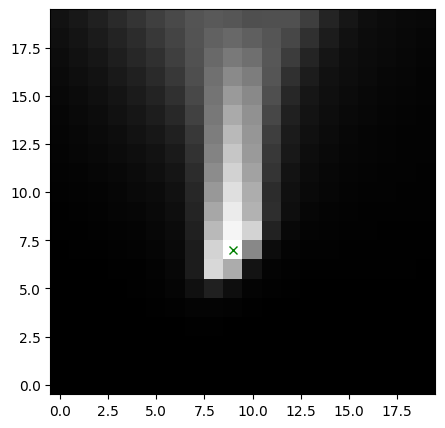

In [4]:
env_3 = Maze(sparse=False, model=model, move_penalty=0.1)
env_3.shrink_reward(shrink_factor/4)
env_3.plot_reward()
#Q_3 = env_3.value_iter2(iters=iters, alpha=alpha,gamma=gamma,initial_eps=initial_epsilon, eps_anneal_rate=eps_anneal_rate,disp=True,plot_freq=1000)


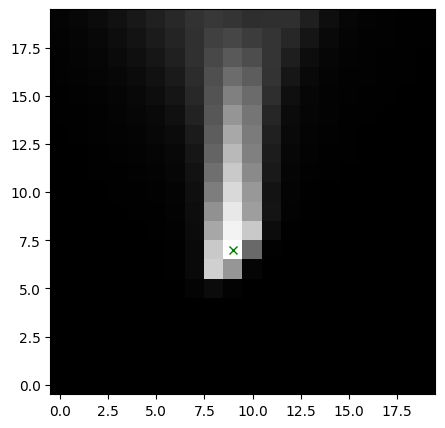

In [5]:

env_4 = Maze(sparse=False, model=model, move_penalty=0.1)
env_4.shrink_reward(shrink_factor/2)
env_4.plot_reward()
#Q_4 = env_4.value_iter2(iters=iters, alpha=alpha,gamma=gamma,initial_eps=initial_epsilon, eps_anneal_rate=eps_anneal_rate,disp=True,plot_freq=1000)


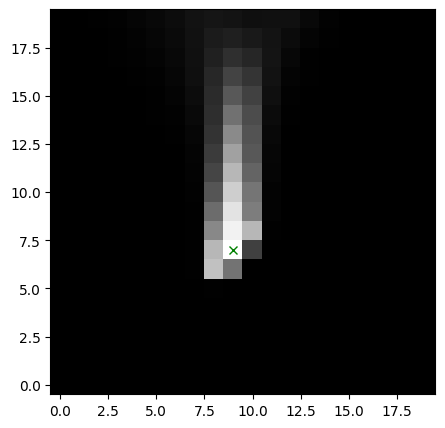

In [6]:

env_5 = Maze(sparse=False, model=model, move_penalty=0.1)
env_5.shrink_reward(shrink_factor)
env_5.plot_reward()
#Q_5 = env_5.value_iter2(iters=iters, alpha=alpha,gamma=gamma,initial_eps=initial_epsilon, eps_anneal_rate=eps_anneal_rate,disp=True,plot_freq=1000)

In [7]:
#evaluate the performance of the 5 agents over different initial_eps
eps = np.arange(0.1,1.0,0.1)
performance_1_eps = []
performance_2_eps = []
performance_3_eps = []
performance_4_eps = []
performance_5_eps = []
num_trials = 50

for e in eps:
    perf_1 = 0
    perf_2 = 0
    perf_3 = 0
    perf_4 = 0
    perf_5 = 0
    for i in range(num_trials):
        print(f"Trial {i}")
        Q_1 = env_1.value_iter2(iters=iters, alpha=alpha,gamma=gamma,initial_eps=initial_epsilon, eps_anneal_rate=eps_anneal_rate,disp=False)
        Q_2 = env_2.value_iter2(iters=iters, alpha=alpha,gamma=gamma,initial_eps=initial_epsilon, eps_anneal_rate=eps_anneal_rate,disp=False)
        Q_3 = env_3.value_iter2(iters=iters, alpha=alpha,gamma=gamma,initial_eps=initial_epsilon, eps_anneal_rate=eps_anneal_rate,disp=False)
        Q_4 = env_4.value_iter2(iters=iters, alpha=alpha,gamma=gamma,initial_eps=initial_epsilon, eps_anneal_rate=eps_anneal_rate,disp=False)
        Q_5 = env_5.value_iter2(iters=iters, alpha=alpha,gamma=gamma,initial_eps=initial_epsilon, eps_anneal_rate=eps_anneal_rate,disp=False)
        perf_1 += env_1.evaluate_Q(Q=Q_1, episodes=10, steps=100, initial_eps=e, eps_anneal_rate=0.0)
        perf_2 += env_2.evaluate_Q(Q=Q_2, episodes=10, steps=100, initial_eps=e, eps_anneal_rate=0.0)
        perf_3 += env_3.evaluate_Q(Q=Q_3, episodes=10, steps=100, initial_eps=e, eps_anneal_rate=0.0)
        perf_4 += env_4.evaluate_Q(Q=Q_4, episodes=10, steps=100, initial_eps=e, eps_anneal_rate=0.0)
        perf_5 += env_5.evaluate_Q(Q=Q_5, episodes=10, steps=100, initial_eps=e, eps_anneal_rate=0.0)
    performance_1_eps.append(perf_1/num_trials)
    performance_2_eps.append(perf_2/num_trials)
    performance_3_eps.append(perf_3/num_trials)
    performance_4_eps.append(perf_4/num_trials)
    performance_5_eps.append(perf_5/num_trials)


Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 10
Trial 11
Trial 12
Trial 13
Trial 14
Trial 15
Trial 16
Trial 17
Trial 18
Trial 19
Trial 20
Trial 21
Trial 22
Trial 23
Trial 24
Trial 25
Trial 26
Trial 27
Trial 28
Trial 29
Trial 30
Trial 31
Trial 32
Trial 33
Trial 34
Trial 35
Trial 36
Trial 37
Trial 38
Trial 39
Trial 40
Trial 41
Trial 42
Trial 43
Trial 44
Trial 45
Trial 46
Trial 47
Trial 48
Trial 49
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 10


In [ ]:
# plot the results
plt.figure()
plt.plot(eps, performance_1_eps, label="Sparse")
plt.plot(eps, performance_2_eps, label="Dense")
plt.plot(eps, performance_3_eps, label="Dense/2.5")
plt.plot(eps, performance_4_eps, label="Dense/5")
plt.plot(eps, performance_5_eps, label="Dense/10")
plt.xlabel("epsilon")
plt.ylabel("Performance")
plt.legend()
plt.savefig(f"{folder}/figs/eval_eps.png")
plt.show()

# plot the results
plt.figure()
plt.plot(1-eps, performance_1_eps, label="Sparse")
plt.plot(1-eps, performance_2_eps, label="Dense")
plt.plot(1-eps, performance_3_eps, label="Dense/2.5")
plt.plot(1-eps, performance_4_eps, label="Dense/5")
plt.plot(1-eps, performance_5_eps, label="Dense/10")
plt.xlabel("greediness")
plt.ylabel("Performance")
plt.legend()
plt.savefig(f"{folder}/figs/eval_greediness.png")
plt.show()

In [ ]:
#evaluate the performance of the 5 agents over different steps
steps = np.arange(50,400,50)
performance_1_steps = []
performance_2_steps = []
performance_3_steps = []
performance_4_steps = []
performance_5_steps = []
for s in steps:
    performance_1_steps.append(env_1.evaluate_Q(Q=Q_1, episodes=eval_episodes, steps=s, initial_eps=0.3, eps_anneal_rate=0.0))
    performance_2_steps.append(env_2.evaluate_Q(Q=Q_2, episodes=eval_episodes, steps=s, initial_eps=0.3, eps_anneal_rate=0.0))
    performance_3_steps.append(env_3.evaluate_Q(Q=Q_3, episodes=eval_episodes, steps=s, initial_eps=0.3, eps_anneal_rate=0.0))
    performance_4_steps.append(env_4.evaluate_Q(Q=Q_4, episodes=eval_episodes, steps=s, initial_eps=0.3, eps_anneal_rate=0.0))
    performance_5_steps.append(env_5.evaluate_Q(Q=Q_5, episodes=eval_episodes, steps=s, initial_eps=0.3, eps_anneal_rate=0.0))

# plot the results
plt.figure()
plt.plot(steps, performance_1_steps, label="Sparse")
plt.plot(steps, performance_2_steps, label="Dense")
plt.plot(steps, performance_3_steps, label="Dense/2.5")
plt.plot(steps, performance_4_steps, label="Dense/5")
plt.plot(steps, performance_5_steps, label="Dense/10")
plt.xlabel("episode length")
plt.ylabel("Performance")
plt.legend()
plt.savefig(f"{folder}/figs/eval_steps.png")
plt.show()

In [ ]:
# create side by side subplots of the 5 reward functions
plt.figure(figsize=(10,5))
plt.suptitle("Reward landscapes", fontsize=16)
plt.subplot(2,3,1)
plt.imshow(env_1.f.T, origin='lower', cmap='gray')
# hide the axes
plt.axis('off')
plt.title("Sparse")
plt.subplot(2,3,2)
plt.imshow(env_2.f.T, origin='lower', cmap='gray')
plt.axis('off')
plt.title("Dense")
plt.subplot(2,3,3)
plt.imshow(env_3.f.T, origin='lower', cmap='gray')
plt.axis('off')
plt.title("Dense/2.5")
plt.subplot(2,3,4)
plt.imshow(env_4.f.T, origin='lower', cmap='gray')
plt.axis('off')
plt.title("Dense/5")
plt.subplot(2,3,5)
plt.imshow(env_5.f.T, origin='lower', cmap='gray')
plt.axis('off')
plt.title("Dense/10")
plt.savefig(f"{folder}/figs/rewards_compare.png")
plt.show()

# create side by side subplots of the 5 Q functions
plt.figure(figsize=(10,5))
plt.suptitle("Q landscapes", fontsize=16)
plt.subplot(2,3,1)
plt.imshow(np.max(Q_1,axis=1).reshape(env_1.N,env_1.N).T,origin='lower', cmap='gray')
# hide the axes
plt.axis('off')
plt.title("Sparse")
plt.subplot(2,3,2)
plt.imshow(np.max(Q_2,axis=1).reshape(env_1.N,env_1.N).T,origin='lower', cmap='gray')
plt.axis('off')
plt.title("Dense")
plt.subplot(2,3,3)
plt.imshow(np.max(Q_3,axis=1).reshape(env_1.N,env_1.N).T,origin='lower', cmap='gray')
plt.axis('off')
plt.title("Dense/2.5")
plt.subplot(2,3,4)
plt.imshow(np.max(Q_4,axis=1).reshape(env_1.N,env_1.N).T,origin='lower', cmap='gray')
plt.axis('off')
plt.title("Dense/5")
plt.subplot(2,3,5)
plt.imshow(np.max(Q_5,axis=1).reshape(env_1.N,env_1.N).T,origin='lower', cmap='gray')
plt.axis('off')
plt.title("Dense/10")
plt.savefig(f"{folder}/figs/rewards_compare.png")
plt.show()

